Nama : Kintari Nurul Utami

NIM  : 1301184464 

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv("Instagram.csv", index_col=0)

In [3]:
df

,Unnamed: 1,Name,Date,Likes,Comment,(view source)
1,NaN,_nurull29,2021-04-18 04:57:47,0,Semoga cepat sembuh semuanya.. Badai pasti ber...,https://www.instagram.com/p/CNwv1OZB407/c/1786...
2,NaN,febienurma,2021-04-18 05:03:39,0,Ya Allah 🥺 cepet sembuh ya sekeluarganya kak t...,https://www.instagram.com/p/CNwv1OZB407/c/1789...
3,NaN,iyungiyungggggggggggggggggggg,2021-04-18 08:34:52,0,❤️❤️,https://www.instagram.com/p/CNwv1OZB407/c/1787...
4,NaN,pramesthirafa,2021-04-18 08:35:00,1,cepet sembuhh baimmm gantenggg!!!,https://www.instagram.com/p/CNwv1OZB407/c/1787...
5,NaN,ikaptry__,2021-04-18 08:39:38,0,"Aamiin, semoga lekas pulih semuanya ka",https://www.instagram.com/p/CNwv1OZB407/c/1791...
...,...,...,...,...,...,...
96,NaN,beautyselfcontrol,2021-04-23 11:38:18,0,Guys jadi baim kena jg apa gmn guys? 😢,https://www.instagram.com/p/CNwv1OZB407/c/1790...
97,NaN,bilqiskhansaaa,2021-04-24 00:20:40,0,Semoga lekas sembuh semuaa 😢❤️ dan ka tipang s...,https://www.instagram.com/p/CNwv1OZB407/c/1787...
98,NaN,shopee.haull,2021-04-24 04:46:07,0,Ga tega bgt liat baim😢,https://www.instagram.com/p/CNwv1OZB407/c/1789...
99,NaN,briancaadws,2021-04-24 06:26:39,0,Spill baju baim dong kak,https://www.instagram.com/p/CNwv1OZB407/c/1788...


In [4]:
text = " ".join(review for review in df.Comment)
print("There are {} words in the combination of all review.".format(len(text)))
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
print("There are {} types of name in this dataset such as {}... \n".format(len(df.Name.unique()), 
                                                                           ", ".join(df.Name.unique()[5:10])))

There are 5428 words in the combination of all review.
There are 100 observations and 6 features in this dataset. 

There are 99 types of name in this dataset such as dyalydia23, nuranisah94, flowers.shop27, dwiptrii_05, yurikeshelina... 



In [5]:
df[["Name", "Comment"]]

,Name,Comment
1,_nurull29,Semoga cepat sembuh semuanya.. Badai pasti ber...
2,febienurma,Ya Allah 🥺 cepet sembuh ya sekeluarganya kak t...
3,iyungiyungggggggggggggggggggg,❤️❤️
4,pramesthirafa,cepet sembuhh baimmm gantenggg!!!
5,ikaptry__,"Aamiin, semoga lekas pulih semuanya ka"
...,...,...
96,beautyselfcontrol,Guys jadi baim kena jg apa gmn guys? 😢
97,bilqiskhansaaa,Semoga lekas sembuh semuaa 😢❤️ dan ka tipang s...
98,shopee.haull,Ga tega bgt liat baim😢
99,briancaadws,Spill baju baim dong kak


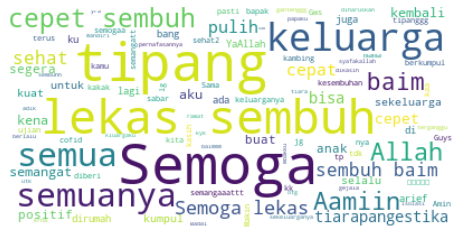

In [6]:
stopwords = set(STOPWORDS)
stopwords.update(["ka", "dan", "ya", "yang", "kak", "ini", "yg", "yaa"])

wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
wordcloud.to_file("wordcloudinstagram.png")

In [8]:
ig = " ".join(review for review in df.Comment)

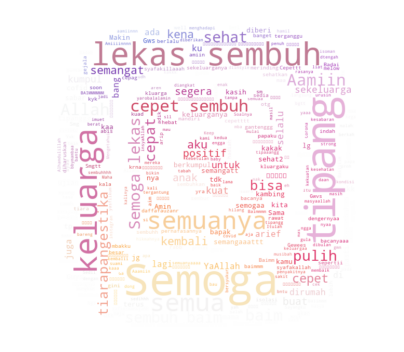

In [9]:
mask = np.array(Image.open("instagram.jpg"))
wordcloud_ig = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(ig)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ig.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("ig.png", format="png")

plt.show()